# WeatherPy --------Erica - UPDATE THIS before turning in!--------
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.



In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as ow

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations; replace size with 1500
lats = np.random.uniform(low=-90.000, high=90.000, size=150)
lngs = np.random.uniform(low=-180.000, high=180.000, size=150)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

104

In [3]:
cities15 = cities[0:15]
print(cities15)

['bluff', 'brattvag', 'guerrero negro', 'muroto', 'ushuaia', 'chokurdakh', 'punta arenas', 'tiznit', 'plunge', 'tuktoyaktuk', 'busselton', 'ulaanbaatar', 'lolua', 'westerland', 'zhangye']


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Set up lists to populate with data
city_names = []
cloudiness = []
country = []
date = []
hum = []
lat = []
lng = []
max_temp = []
wind_sp = []

# create settings dictionary to use in request urls
settings = {"units":"imperial", "appid":api_key}

# Print start of processing
print("Beginning Data Retrieval")
print("-----------------------------")

# set up counters
record_cnt = 1
grp = 1

# loop to iterate through each city, group into sets of 50, and capture counts
for i, city in enumerate(cities15):
#     change to 50 later
    if (i % 5 == 0 and i >= 5):
        grp += 1
        record_cnt = 1
    
    try:
#        use api wrapper to get responses for city and print status message
        response = ow.get_current(city,**settings)
        print(f"Processing record {record_cnt} of set {grp} | {city}")
        
#        add response values to appropriate lists 
        city_names.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        hum.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_sp.append(response['wind']['speed'])
        
        record_cnt += 1
        
#     skip if error found with current city 
    except:
        print("City not found. Skipping...")
    pass
    

# Print statement to indicate complete
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing record 1 of set 1 | bluff
Processing record 2 of set 1 | brattvag
Processing record 3 of set 1 | guerrero negro
Processing record 4 of set 1 | muroto
Processing record 5 of set 1 | ushuaia
Processing record 1 of set 2 | chokurdakh
Processing record 2 of set 2 | punta arenas
Processing record 3 of set 2 | tiznit
Processing record 4 of set 2 | plunge
Processing record 5 of set 2 | tuktoyaktuk
Processing record 1 of set 3 | busselton
Processing record 2 of set 3 | ulaanbaatar
City not found. Skipping...
Processing record 3 of set 3 | westerland
Processing record 4 of set 3 | zhangye
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# populate data frame with collected data
weather_data = pd.DataFrame({"City":city_names, "Cloudiness":cloudiness, "Country":country,
                             "Date":date, "Humidity":hum, "Lat":lat, "Lng":lng, 
                             "Max Temp":max_temp, "Wind Speed":wind_sp})

# check counts for each column
weather_data.count()

City          14
Cloudiness    14
Country       14
Date          14
Humidity      14
Lat           14
Lng           14
Max Temp      14
Wind Speed    14
dtype: int64

In [6]:
# save data frame to CSV
weather_data.to_csv(output_data_file, encoding="utf-8", index=False)

# display data frame
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bluff,0,AU,1551068237,35,-23.58,149.07,90.36,11.77
1,Brattvag,92,NO,1551066600,75,62.60,6.44,41.00,8.05
2,Guerrero Negro,0,MX,1551068238,77,27.97,-114.04,55.71,13.11
3,Muroto,40,JP,1551063600,44,33.37,134.14,60.80,6.93
4,Ushuaia,75,AR,1551067200,52,-54.81,-68.31,41.00,18.34


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

## figure out ADD CURRENT DATE to include in plot titles

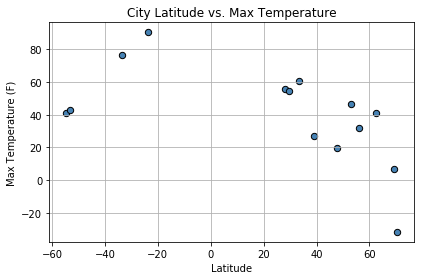

In [11]:
# create scatter plot for latitude and max temperature
plt.scatter(weather_data['Lat'], 
            weather_data['Max Temp'],
            marker = 'o',
            s = 40,
            c = 'steelblue',
            edgecolors = 'black'
           )

# set up labels and add grid
plt.title(f"City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.tight_layout()

# save to file
plt.savefig("output_data/Lat_vs_Temp.png")

# display plot
plt.show()

#### Latitude vs. Humidity Plot

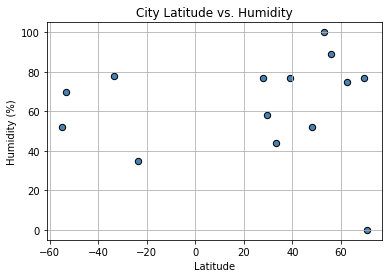

In [12]:
# create scatter plot for latitude and humidity
plt.scatter(weather_data['Lat'], 
            weather_data['Humidity'],
            marker = 'o',
            s = 40,
            c = 'steelblue',
            edgecolors = 'black',
           )

# set up labels and add grid
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# save to file
plt.savefig("output_data/Lat_vs_Humidity.png")

# display plot
plt.show()

#### Latitude vs. Cloudiness Plot

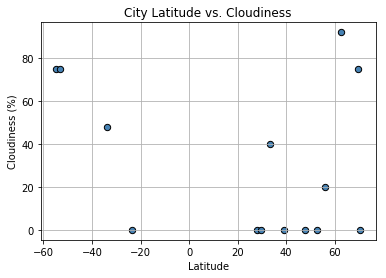

In [13]:
# create scatter plot for latitude and cloudiness
plt.scatter(weather_data['Lat'], 
            weather_data['Cloudiness'],
            marker = 'o',
            s = 40,
            c = 'steelblue',
            edgecolors = 'black',
           )

# set up labels and add grid
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()


# save to file
plt.savefig("output_data/Lat_vs_Clouds.png")

# display plot
plt.show()

#### Latitude vs. Wind Speed Plot

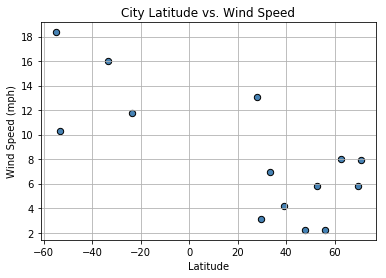

In [14]:
# create scatter plot for latitude and wind speed
plt.scatter(weather_data['Lat'], 
            weather_data['Wind Speed'],
            marker = 'o',
            s = 40,
            c = 'steelblue',
            edgecolors = 'black',
           )

# set up labels and add grid
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# save to file
plt.savefig("output_data/Lat_vs_WindSpeed.png")

# display plot
plt.show()